In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [13]:
df=pd.read_csv("D:\Machine Learning\Datasets\loans.csv")

In [15]:
# count plot on single categorical variable
sns.countplot(x="count",hue="not.fully.paid",data=df)
 
# Show the plot
plt.show()

ValueError: Could not interpret input 'count'

In [101]:
df.dropna(inplace=True)

In [102]:
ser=pd.Series(np.where(df["purpose"]=="credit_card","major_purchase",df["purpose"]),index=df.index)

In [103]:
ser=pd.Series(np.where(ser=="home_improvement","all_other",ser),index=ser.index)

In [104]:
ser=pd.Series(np.where(ser=="debt_consolidation","all_other",ser),index=ser.index)

In [105]:
df["purpose1"]=ser.values

In [106]:
pd.crosstab(df["purpose1"],df["not.fully.paid"],normalize="index")

not.fully.paid,0,1
purpose1,,
all_other,0.841852,0.158148
educational,0.797059,0.202941
major_purchase,0.885275,0.114725
small_business,0.721683,0.278317


In [107]:
df["purpose1"].value_counts()

all_other         6867
major_purchase    1691
small_business     618
educational        340
Name: purpose1, dtype: int64

In [108]:
arr=np.where(df["pub.rec"]>=1,1,0)
ser=pd.Series(arr,index=df.index)
df["pub.rec1"]=ser.values
df["pub.rec1"].value_counts()


0    8960
1     556
Name: pub.rec1, dtype: int64

<AxesSubplot:xlabel='inq', ylabel='count'>

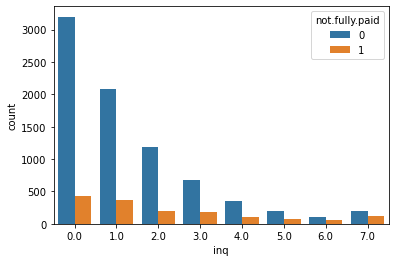

In [109]:
arr=np.where(df["inq.last.6mths"]>=8,7,df["inq.last.6mths"])
df["inq"]=pd.Series(arr,index=df.index)
sns.countplot(x="inq",hue="not.fully.paid",data=df)

In [110]:
purpose={state:ind for ind,state in enumerate( df["purpose1"].unique() , 1)}
df["purpose1"].replace(purpose,inplace=True)

In [111]:
mybins=4
df["installment_dis"]=pd.qcut(df["installment"],q=mybins,labels=list(range(1,5))).astype(np.int)
df["dti_dis"]=pd.qcut(df["dti"],q=mybins,labels=list(range(1,5))).astype(np.int)
df["revol.bal_dis"]=pd.qcut(df["revol.bal"],q=mybins,labels=list(range(1,5))).astype(np.int)
df["revol.util_dis"]=pd.qcut(df["revol.util"],q=mybins,labels=list(range(1,5))).astype(np.int)
df["days.with.cr.line_dis"]=pd.qcut(df["days.with.cr.line"],q=mybins,labels=list(range(1,5))).astype(np.int)
df["log.annual.inc_dis"]=pd.qcut(df["log.annual.inc"],q=mybins,labels=list(range(1,5))).astype(np.int)

In [112]:
des=df[ ["credit.policy","purpose1","inq","delinq.2yrs","pub.rec1","dti_dis","installment_dis","log.annual.inc_dis","days.with.cr.line_dis","revol.bal_dis","revol.util_dis"] ]  #Discrete

In [113]:
X=des

In [114]:
y=df["not.fully.paid"]

In [115]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.25,random_state=42)

In [116]:
from sklearn import ensemble
model=ensemble.RandomForestClassifier(random_state=42)
model.fit(Xtrain,ytrain)
ser=pd.Series(model.feature_importances_,index=Xtrain.columns)
ser.sort_values(ascending=False)

inq                      0.152701
days.with.cr.line_dis    0.129112
dti_dis                  0.128247
installment_dis          0.118977
revol.bal_dis            0.109613
log.annual.inc_dis       0.105429
revol.util_dis           0.098702
purpose1                 0.066950
delinq.2yrs              0.044439
credit.policy            0.026931
pub.rec1                 0.018900
dtype: float64

In [117]:
def getoutliers(ser,type="both"):
    iqr=ser.quantile(q=.75)-ser.quantile(q=.25)
    thup=ser.quantile(q=.75)+1.5*iqr
    thlow=ser.quantile(q=.25)-1.5*iqr
    if type=="upper":
        return ser[ser>thup].index.values
    if type=="both":
        return ser[(ser>thup) | (ser<thlow)].index.values
    if type=="lower":
        return ser[ser<thlow].index.values

In [118]:
model=ensemble.RandomForestClassifier(random_state=42,n_estimators=100)
for col in range(2,Xtrain.shape[1]+1):
    #print(Xtrain.columns.values[:col])
    X1=Xtrain[Xtrain.columns.values[:col]]
    X2=Xtest[Xtrain.columns.values[:col]]
    model.fit(X1,ytrain)
    trainp=model.predict(X1)
    testp=model.predict(X2)
    trainrecall=metrics.recall_score(ytrain,trainp)
    testrecall=metrics.recall_score(ytest,testp)
    print("columns : ",X1.columns.values)
    print("train recall ",trainrecall,"test recall ",testrecall)
    print("=======================================================")

columns :  ['credit.policy' 'purpose1']
train recall  0.0 test recall  0.0
columns :  ['credit.policy' 'purpose1' 'inq']
train recall  0.029668411867364748 test recall  0.021333333333333333
columns :  ['credit.policy' 'purpose1' 'inq' 'delinq.2yrs']
train recall  0.04013961605584642 test recall  0.018666666666666668
columns :  ['credit.policy' 'purpose1' 'inq' 'delinq.2yrs' 'pub.rec1']
train recall  0.0636998254799302 test recall  0.024
columns :  ['credit.policy' 'purpose1' 'inq' 'delinq.2yrs' 'pub.rec1' 'dti_dis']
train recall  0.12303664921465969 test recall  0.048
columns :  ['credit.policy' 'purpose1' 'inq' 'delinq.2yrs' 'pub.rec1' 'dti_dis'
 'installment_dis']
train recall  0.23821989528795812 test recall  0.072
columns :  ['credit.policy' 'purpose1' 'inq' 'delinq.2yrs' 'pub.rec1' 'dti_dis'
 'installment_dis' 'log.annual.inc_dis']
train recall  0.37783595113438045 test recall  0.096
columns :  ['credit.policy' 'purpose1' 'inq' 'delinq.2yrs' 'pub.rec1' 'dti_dis'
 'installment_dis'

In [119]:
def getmetrics(Xtrain,Xtest,ytrain,ytest,collist,model):
    X1=Xtrain[collist]
    X2=Xtest[collist]
    model.fit(X1,ytrain)
    trainp=model.predict(X1)
    testp=model.predict(X2)
    trainrecall=metrics.recall_score(ytrain,trainp)
    testrecall=metrics.recall_score(ytest,testp)
    return collist,trainrecall,testrecall

In [120]:
from itertools import combinations
cols=[]
colscount=[]
trainre=[]
testre=[]
model=ensemble.RandomForestClassifier(random_state=42)
for val in range(2,5):
    clist=[list(t) for t in list(combinations(list(Xtrain.columns),val))]
    for collist in clist:
        t=getmetrics(Xtrain,Xtest,ytrain,ytest,collist,model)
        cols.append(t[0])
        colscount.append(len(t[0]))
        trainre.append(t[1])
        testre.append(t[2])
import sklearn
print(sklearn.__version__)
mdf=pd.DataFrame({"colums":cols,"count":colscount,"train":trainre,"test":testre})
mdf[mdf["count"]==4].sort_values(by="test",ascending=False)

0.23.2


,colums,count,train,test
461,"[inq, dti_dis, installment_dis, days.with.cr.l...",4,0.100349,0.066667
477,"[inq, log.annual.inc_dis, days.with.cr.line_di...",4,0.093368,0.066667
366,"[purpose1, inq, days.with.cr.line_dis, revol.u...",4,0.090750,0.061333
460,"[inq, dti_dis, installment_dis, log.annual.inc...",4,0.098604,0.056000
472,"[inq, installment_dis, log.annual.inc_dis, rev...",4,0.096859,0.056000
...,...,...,...,...
287,"[credit.policy, delinq.2yrs, pub.rec1, days.wi...",4,0.014834,0.000000
328,"[credit.policy, dti_dis, days.with.cr.line_dis...",4,0.000000,0.000000
511,"[delinq.2yrs, log.annual.inc_dis, days.with.cr...",4,0.015707,0.000000
484,"[delinq.2yrs, pub.rec1, dti_dis, revol.util_dis]",4,0.006981,0.000000


In [121]:
from sklearn import ensemble
from itertools import combinations
cols=[]
colscount=[]
trainre=[]
testre=[]
model=ensemble.RandomForestClassifier(random_state=42)
for val in range(2,6):
    clist=[list(t) for t in list(combinations(list(Xtrain.columns),val))]
    for collist in clist:
        t=getmetrics(Xtrain,Xtest,ytrain,ytest,collist,model)
        cols.append(t[0])
        colscount.append(len(t[0]))
        trainre.append(t[1])
        testre.append(t[2])

In [122]:
mdf=pd.DataFrame({"colums":cols,"count":colscount,"train":trainre,"test":testre})

In [123]:
mdf[mdf["count"]==5].sort_values(by="test",ascending=False)

,colums,count,train,test
948,"[inq, dti_dis, log.annual.inc_dis, days.with.c...",5,0.226003,0.101333
941,"[inq, dti_dis, installment_dis, log.annual.inc...",5,0.221640,0.096000
952,"[inq, installment_dis, log.annual.inc_dis, day...",5,0.239965,0.093333
804,"[purpose1, inq, dti_dis, days.with.cr.line_dis...",5,0.195462,0.090667
671,"[credit.policy, inq, dti_dis, installment_dis,...",5,0.144852,0.088000
...,...,...,...,...
690,"[credit.policy, delinq.2yrs, pub.rec1, dti_dis...",5,0.041012,0.008000
978,"[delinq.2yrs, dti_dis, installment_dis, log.an...",5,0.049738,0.005333
691,"[credit.policy, delinq.2yrs, pub.rec1, dti_dis...",5,0.025305,0.005333
696,"[credit.policy, delinq.2yrs, pub.rec1, install...",5,0.029668,0.005333


In [124]:
from sklearn.feature_selection import SelectFromModel
from sklearn import ensemble
model=ensemble.RandomForestClassifier(n_estimators = 100)
model1=SelectFromModel(model,max_features=5)
model1.fit(Xtrain,ytrain)
model1.get_support()

array([False, False,  True, False, False,  True,  True, False,  True,
        True, False])

In [125]:
selcom= Xtrain.columns[(model1.get_support())]

In [126]:
selcom

Index(['inq', 'dti_dis', 'installment_dis', 'days.with.cr.line_dis',
       'revol.bal_dis'],
      dtype='object')

In [127]:
selcom=df[['inq', 'dti_dis', 'installment_dis', 'days.with.cr.line_dis',
       'revol.bal_dis']]

In [128]:
X=selcom
y=df["not.fully.paid"]

Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.25,random_state=42)

In [129]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import utils 
from  sklearn import metrics 
from sklearn import tree
from sklearn.feature_selection import RFECV
from sklearn import feature_selection 
from sklearn import naive_bayes 
from sklearn import neighbors
from sklearn import ensemble
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[] 
    modelnames=["LR","DecisionTree","KNN","NB","RF"]
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    models.append(ensemble.RandomForestClassifier())
    for name,model in zip(modelnames,models): 
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k} 
            grid_obj=model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="f1") 
            grid_fit=grid_obj.fit(Xtrain,ytrain) 
            model =grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
        else:
            model.fit(Xtrain,ytrain)
            trainprediction=model.predict(Xtrain)
            testprediction=model.predict(Xtest)
        scores=list() 
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)

def modelstats2(Xtrain,Xtrainohe,Xtest,Xtestohe,ytrain,ytest):
    stats=[] 
    modelnames=["LR","DecisionTree","KNN","NB","RF"]
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    models.append(ensemble.RandomForestClassifier())
    for name,model in zip(modelnames,models): 
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k} 
            grid_obj=model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="f1") 
            grid_fit=grid_obj.fit(Xtrain,ytrain) 
            model =grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
        elif name=="LR":
            model.fit(Xtrainohe,ytrain)
            trainprediction=model.predict(Xtrainohe)
            testprediction=model.predict(Xtestohe)
        else:
            model.fit(Xtrain,ytrain)
            trainprediction=model.predict(Xtrain)
            testprediction=model.predict(Xtest)
        scores=list() 
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)

In [130]:
modelstats1(Xtrain,Xtest,ytrain,ytest)

D:\Apps\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Apps\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.839428,0.000000,0.000000,0.500000
1,LR-test,0.842371,0.000000,0.000000,0.500000
2,DecisionTree-train,0.863808,0.850806,0.184119,0.588971
3,DecisionTree-test,0.823455,0.297297,0.088000,0.524539
4,KNN(5)-train,0.863808,0.850806,0.184119,0.588971
5,KNN(5)-test,0.823455,0.297297,0.088000,0.524539
6,NB-train,0.825277,0.351032,0.103839,0.533559
7,NB-test,0.834384,0.411215,0.117333,0.542948
8,RF-train,0.863808,0.745763,0.230366,0.607672
9,RF-test,0.820092,0.277311,0.088000,0.522543
